In [1]:
# notebook: analyze_video_predictions.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Nastavenie vizualizačného štýlu
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cesta k CSV súboru
csv_path = "../.scratch/chances_predictions.csv"

# Načítanie dát
df = pd.read_csv(csv_path)

# Ukážka dát
df.head()


,Input_Dir,Action_Index,Frame_Index,Action,Value,Flipped,Chosen_Value,Action_Prob_0,Action_Prob_1,Action_Prob_2,...,Action_Prob_9,Action_Prob_10,Action_Prob_11,Action_Prob_12,Action_Prob_13,Action_Prob_14,Action_Prob_15,Action_Prob_16,Action_Prob_17,Action_Prob_18
0,True,0,75,15,0.14628,-0.148298,0.14830,0.018360,0.008002,0.018203,...,0.066892,0.028895,0.011687,0.013505,0.029862,0.019236,0.334713,0.019422,0.096426,0.010039
1,True,0,76,7,0.18445,-0.176066,0.18445,0.025276,0.011750,0.026925,...,0.073106,0.044538,0.017435,0.016600,0.043040,0.023890,0.186543,0.019164,0.098209,0.019593
2,True,0,77,7,0.20386,-0.234172,0.23417,0.022514,0.010232,0.023240,...,0.064478,0.031581,0.016460,0.016147,0.039134,0.023108,0.246212,0.019042,0.079392,0.016027
3,True,0,78,15,0.15809,-0.192017,0.19202,0.015363,0.006221,0.015700,...,0.058698,0.024744,0.010364,0.013904,0.028289,0.016364,0.385646,0.017643,0.069771,0.010872
4,True,0,79,15,0.10303,-0.206392,0.20639,0.019512,0.006560,0.017694,...,0.058160,0.020816,0.010783,0.016039,0.028020,0.016111,0.392576,0.018644,0.065911,0.011189


In [2]:
# Počet záznamov
print(f"Počet predikcií: {len(df)}")

# Akcie s najvyššou pravdepodobnosťou
most_common_actions = df["Action"].value_counts().head(10)
print("Top 10 najčastejších akcií:")
print(most_common_actions)

# Distribúcia hodnôt (value)
df["Chosen_Value"].describe()


Počet predikcií: 2591
Top 10 najčastejších akcií:
7     1360
15    1025
3      202
2        4
Name: Action, dtype: int64


count    2591.000000
mean        0.248254
std         0.111905
min         0.007720
25%         0.179620
50%         0.255400
75%         0.301540
max         1.370130
Name: Chosen_Value, dtype: float64

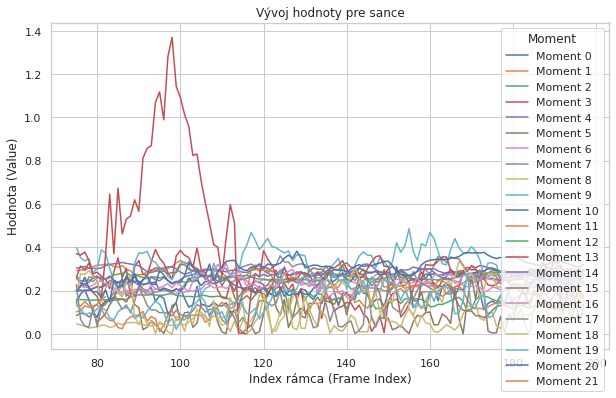

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrujeme stĺpec 'Value' a 'Frame_Index', aby sme mali časový vývoj hodnôt
df_values = df[['Frame_Index', 'Value', 'Action_Index']]

# Pre každý Action_Index (moment) vytvoríme graf
plt.figure(figsize=(10, 6))

for action_index in df['Action_Index'].unique():
    # Filtrujeme hodnoty pre konkrétny moment (Action_Index)
    action_data = df_values[df_values['Action_Index'] == action_index]
    
    # Zobrazenie vývoja hodnoty pre tento moment (Action_Index)
    plt.plot(action_data['Frame_Index'], action_data['Value'], label=f'Moment {action_index}')

# Nastavenie grafu
plt.title("Vývoj hodnoty pre sance")
plt.xlabel("Index rámca (Frame Index)")
plt.ylabel("Hodnota (Value)")
plt.legend(title="Moment")
plt.grid(True)

# Zobrazenie grafu
plt.show()


In [4]:
# Načítanie dát
df_no = pd.read_csv("../.scratch/no_chances_predictions.csv")

In [5]:
# Počet záznamov
print(f"Počet predikcií: {len(df_no)}")

# Akcie s najvyššou pravdepodobnosťou
most_common_actions = df_no["Action"].value_counts().head(10)
print("Top 10 najčastejších akcií:")
print(most_common_actions)

# Distribúcia hodnôt (value)
df_no["Chosen_Value"].describe()

Počet predikcií: 2627
Top 10 najčastejších akcií:
7     2320
15     215
17      70
3       17
10       5
Name: Action, dtype: int64


count    2627.000000
mean        0.186309
std         0.086287
min         0.003370
25%         0.123035
50%         0.165130
75%         0.240110
max         0.851020
Name: Chosen_Value, dtype: float64

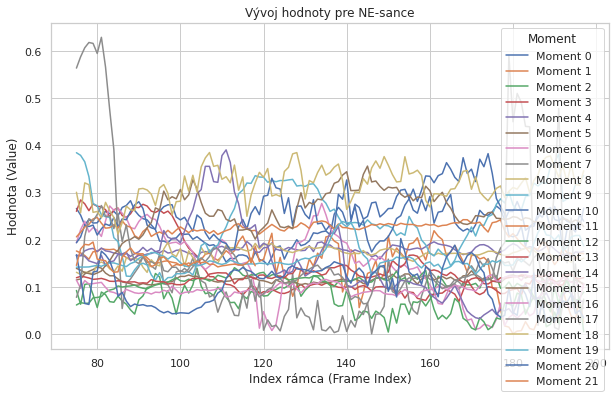

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrujeme stĺpec 'Value' a 'Frame_Index', aby sme mali časový vývoj hodnôt
df_values = df_no[['Frame_Index', 'Value', 'Action_Index']]

# Pre každý Action_Index (moment) vytvoríme graf
plt.figure(figsize=(10, 6))

for action_index in df['Action_Index'].unique():
    # Filtrujeme hodnoty pre konkrétny moment (Action_Index)
    action_data = df_values[df_values['Action_Index'] == action_index]
    
    # Zobrazenie vývoja hodnoty pre tento moment (Action_Index)
    plt.plot(action_data['Frame_Index'], action_data['Value'], label=f'Moment {action_index}')

# Nastavenie grafu
plt.title("Vývoj hodnoty pre NE-sance")
plt.xlabel("Index rámca (Frame Index)")
plt.ylabel("Hodnota (Value)")
plt.legend(title="Moment")
plt.grid(True)

# Zobrazenie grafu
plt.show()


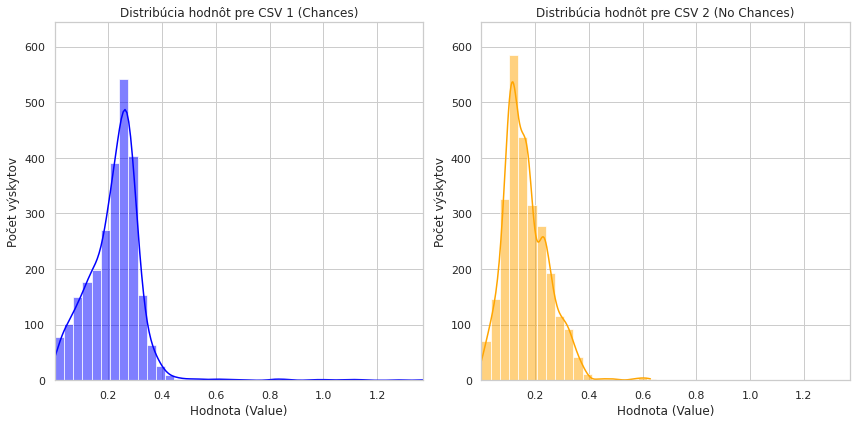

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Načítanie CSV súborov
csv_file_1 = "../.scratch/chances_predictions.csv"
csv_file_2 = "../.scratch/no_chances_predictions.csv"

# Načítanie dát
df1 = pd.read_csv(csv_file_1)
df2 = pd.read_csv(csv_file_2)

values_1 = df1['Value']
values_2 = df2['Value']

# Spoločné hranice pre biny
x_min = min(values_1.min(), values_2.min())
x_max = max(values_1.max(), values_2.max())
bins = np.linspace(x_min, x_max, 41)  # 40 bins = 41 hraničných bodov

# Zistenie maximálneho počtu výskytov (pre y-limit)
counts1, _ = np.histogram(values_1, bins=bins)
counts2, _ = np.histogram(values_2, bins=bins)
y_max = max(counts1.max(), counts2.max())

# Vykreslenie
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(values_1, kde=True, bins=bins, color='blue')
plt.title('Distribúcia hodnôt pre CSV 1 (Chances)')
plt.xlabel('Hodnota (Value)')
plt.ylabel('Počet výskytov')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max + y_max * 0.1)

plt.subplot(1, 2, 2)
sns.histplot(values_2, kde=True, bins=bins, color='orange')
plt.title('Distribúcia hodnôt pre CSV 2 (No Chances)')
plt.xlabel('Hodnota (Value)')
plt.ylabel('Počet výskytov')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max + y_max * 0.1)

plt.tight_layout()
plt.show()


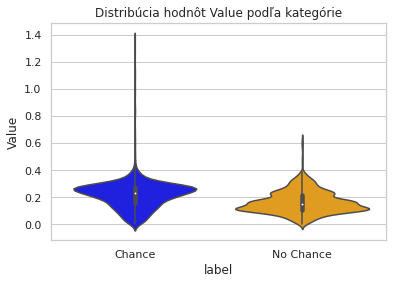

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df1['label'] = 'Chance'
df2['label'] = 'No Chance'
df_all = pd.concat([df1, df2], ignore_index=True)

sns.violinplot(data=df_all, x='label', y='Value', palette=['blue', 'orange'])
plt.title("Distribúcia hodnôt Value podľa kategórie")
plt.show()

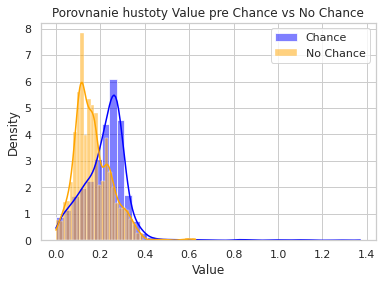

In [13]:
sns.histplot(df1['Value'], color='blue', label='Chance', kde=True, bins=40, stat='density', alpha=0.5)
sns.histplot(df2['Value'], color='orange', label='No Chance', kde=True, bins=40, stat='density', alpha=0.5)
plt.legend()
plt.title("Porovnanie hustoty Value pre Chance vs No Chance")
plt.show()

In [14]:
from scipy.stats import ks_2samp
ks_stat, p_value = ks_2samp(df1['Value'], df2['Value'])
print(f"KS stat: {ks_stat:.4f}, p-value: {p_value:.4e}")

KS stat: 0.3626, p-value: 6.3656e-153


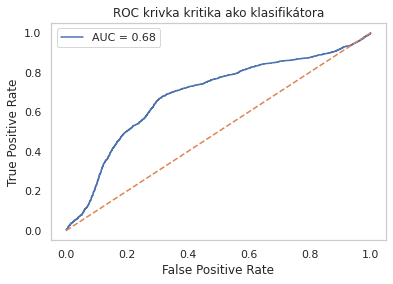

In [15]:
from sklearn.metrics import roc_curve, auc

y_true = [1] * len(df1) + [0] * len(df2)
y_scores = pd.concat([df1['Value'], df2['Value']])
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC krivka kritika ako klasifikátora')
plt.legend()
plt.grid()
plt.show()

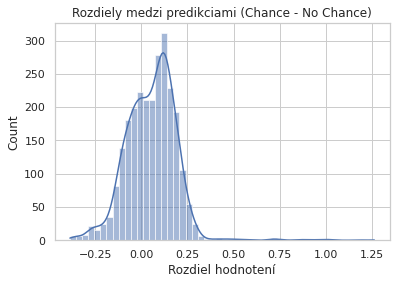

In [17]:
differences = values_1 - values_2  # alebo nejaká logická kombinácia
sns.histplot(differences, bins=50, kde=True)
plt.title('Rozdiely medzi predikciami (Chance - No Chance)')
plt.xlabel('Rozdiel hodnotení')
plt.show()

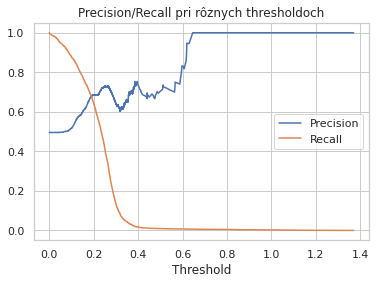

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision/Recall pri rôznych thresholdoch")
plt.show()